In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
data = pd.read_csv('../dataset/data_7diagnosis.csv')
df = data.drop('Diagnosis', axis=1)
diagnosis=data.Diagnosis

## ACP

In [3]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pcs = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 3)])
X['z'] = data['Diagnosis']
pcs['z'] = data['Diagnosis']

## LDA/QDA/NB

In [4]:
models = [
(LinearDiscriminantAnalysis, "LDA"),
(QuadraticDiscriminantAnalysis, "QDA"),
(GaussianNB, "NB"),
]
#sans score F1 :
"""def validation_errors(df, models):
    y = df.z
    X = df.drop(columns=["z"])
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc"""

#avec score F1
def validation_errors(df, models):
    y = df.z
    X = df.drop(columns=["z"])
    for model, name in models:
        acc_scores = cross_val_score(model(), X, y, cv=10)
        f1_scores = cross_val_score(model(), X, y, cv=10, scoring='f1_macro')
        for acc, f1 in zip(acc_scores, f1_scores):
            yield name, acc, f1

scores_discri = pd.DataFrame(validation_errors(pcs, models), columns=["Model", "Acc","F1"])

print(scores_discri)

   Model       Acc        F1
0    LDA  0.561983  0.401753
1    LDA  0.583333  0.397199
2    LDA  0.741667  0.446135
3    LDA  0.700000  0.422636
4    LDA  0.650000  0.393665
5    LDA  0.691667  0.419230
6    LDA  0.658333  0.409324
7    LDA  0.650000  0.400103
8    LDA  0.500000  0.342678
9    LDA  0.533333  0.338330
10   QDA  0.545455  0.385481
11   QDA  0.566667  0.412242
12   QDA  0.733333  0.509981
13   QDA  0.750000  0.511526
14   QDA  0.641667  0.387020
15   QDA  0.733333  0.502541
16   QDA  0.675000  0.418834
17   QDA  0.675000  0.493953
18   QDA  0.458333  0.354764
19   QDA  0.500000  0.410530
20    NB  0.520661  0.378980
21    NB  0.566667  0.381103
22    NB  0.741667  0.516442
23    NB  0.750000  0.511526
24    NB  0.625000  0.382601
25    NB  0.700000  0.480057
26    NB  0.666667  0.414251
27    NB  0.641667  0.450345
28    NB  0.408333  0.331540
29    NB  0.533333  0.417689


## KNN

In [5]:
cls = KNeighborsClassifier(n_neighbors=4)
cls.fit(pcs.drop(columns="z"),diagnosis)

scores_KNN = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10), "F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_KNN.insert(loc=0, column='Model', value='KNN')
print(scores_KNN)



  Model       Acc        F1
0   KNN  0.504132  0.405179
1   KNN  0.750000  0.605436
2   KNN  0.858333  0.677285
3   KNN  0.866667  0.637116
4   KNN  0.783333  0.652654
5   KNN  0.875000  0.750916
6   KNN  0.891667  0.785934
7   KNN  0.691667  0.581395
8   KNN  0.533333  0.433653
9   KNN  0.541667  0.447619


## Régression logistique

In [6]:
#linéaire
cls = LogisticRegression(penalty=None)
cls.fit(pcs.drop(columns="z"), diagnosis)

scores_reg_lin = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'), "F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_reg_lin.insert(loc=0, column='Model', value='LRL')
#multiple
poly = PolynomialFeatures(degree=3)
cls = LogisticRegression()
pipe = make_pipeline(poly, cls)
pipe.fit(pcs.drop(columns="z"), diagnosis)

scores_reg_quad = pd.DataFrame({"Acc":cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'),"F1": cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10,scoring='f1_macro')})
scores_reg_quad.insert(loc=0, column='Model', value='LRQ')

print(scores_reg_lin)
print(scores_reg_quad)

  Model       Acc        F1
0   LRL  0.578512  0.406011
1   LRL  0.591667  0.433514
2   LRL  0.716667  0.429157
3   LRL  0.691667  0.416538
4   LRL  0.625000  0.426143
5   LRL  0.708333  0.484989
6   LRL  0.650000  0.402727
7   LRL  0.658333  0.408579
8   LRL  0.533333  0.424125
9   LRL  0.541667  0.374545
  Model       Acc        F1
0   LRQ  0.570248  0.399432
1   LRQ  0.608333  0.440925
2   LRQ  0.716667  0.429157
3   LRQ  0.691667  0.416538
4   LRQ  0.633333  0.432701
5   LRQ  0.708333  0.484989
6   LRQ  0.650000  0.401407
7   LRQ  0.658333  0.408579
8   LRQ  0.541667  0.429176
9   LRQ  0.541667  0.374545


d:\alexa\Github\projet-sy09\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier()
rf_cls.fit(pcs.drop(columns="z"), diagnosis)

# Calcul des scores de validation croisée
scores_rf = pd.DataFrame({
    "Acc": cross_val_score(rf_cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'),
    "F1": cross_val_score(rf_cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='f1_macro')
})

# Ajouter une colonne pour le modèle
scores_rf.insert(loc=0, column='Model', value='RF')

# Afficher les résultats
print(scores_rf)

  Model       Acc        F1
0    RF  0.578512  0.468104
1    RF  0.733333  0.628638
2    RF  0.866667  0.751215
3    RF  0.866667  0.679287
4    RF  0.808333  0.692724
5    RF  0.891667  0.840743
6    RF  0.891667  0.814559
7    RF  0.766667  0.615694
8    RF  0.483333  0.457314
9    RF  0.466667  0.375070


In [19]:
from sklearn.svm import SVC


svm_cls = SVC(kernel='rbf')  # Vous pouvez changer le kernel selon vos besoins
svm_cls.fit(pcs.drop(columns="z"), diagnosis)

# Calcul des scores de validation croisée pour l'accuracy et le F1-macro
acc_scores = cross_val_score(svm_cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy')
f1_scores = cross_val_score(svm_cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='f1_macro')

# Créer un DataFrame pour stocker les scores individuels
scores_svm = pd.DataFrame({
    "Acc": acc_scores,
    "F1": f1_scores
})

# Ajouter une colonne pour le modèle
scores_svm.insert(loc=0, column='Model', value='SVM')

# Calculer les moyennes des scores
mean_acc = acc_scores.mean()
mean_f1 = f1_scores.mean()

# Afficher les résultats
print("Scores individuels de validation croisée :")
print(scores_svm)
print("\nMoyenne des scores de validation croisée :")
print(f"Average Accuracy: {mean_acc:.4f}")
print(f"Average F1 Score: {mean_f1:.4f}")

#afficher la moyenne de accuracy et f1 de scores_svm

Scores individuels de validation croisée :
  Model       Acc        F1
0   SVM  0.537190  0.328104
1   SVM  0.658333  0.473156
2   SVM  0.783333  0.543027
3   SVM  0.825000  0.557699
4   SVM  0.725000  0.437581
5   SVM  0.833333  0.601214
6   SVM  0.741667  0.560137
7   SVM  0.683333  0.470614
8   SVM  0.508333  0.419559
9   SVM  0.516667  0.409989

Moyenne des scores de validation croisée :
Average Accuracy: 0.6812
Average F1 Score: 0.4801


## Analyse graphique

   Model       Acc        F1
0    LDA  0.561983  0.401753
1    LDA  0.583333  0.397199
2    LDA  0.741667  0.446135
3    LDA  0.700000  0.422636
4    LDA  0.650000  0.393665
..   ...       ...       ...
75   SVM  0.833333  0.601214
76   SVM  0.741667  0.560137
77   SVM  0.683333  0.470614
78   SVM  0.508333  0.419559
79   SVM  0.516667  0.409989

[80 rows x 3 columns]
    Model Type de score     Score
0     LDA           Acc  0.561983
1     LDA           Acc  0.583333
2     LDA           Acc  0.741667
3     LDA           Acc  0.700000
4     LDA           Acc  0.650000
..    ...           ...       ...
155   SVM            F1  0.601214
156   SVM            F1  0.560137
157   SVM            F1  0.470614
158   SVM            F1  0.419559
159   SVM            F1  0.409989

[160 rows x 3 columns]


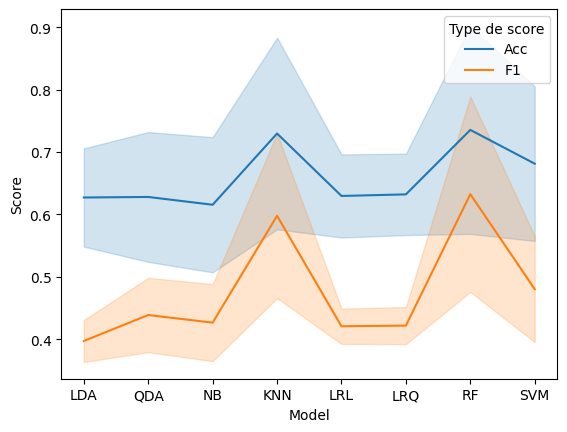

In [20]:
scores= pd.concat([scores_discri, scores_KNN, scores_reg_lin, scores_reg_quad, scores_rf, scores_svm], ignore_index=True)
print(scores)

scores_melted = scores.melt(id_vars=["Model"],value_vars=["Acc", "F1"], var_name="Type de score", value_name="Score")
print(scores_melted)
sns.lineplot(x="Model", y="Score", data=scores_melted, hue="Type de score",errorbar='sd')
plt.show()